In [2]:
using Printf
using PyPlot

In [3]:
function draw_plot(f, a, b, step)
    x=a:step:b
    y=f.(x)
    plot(x,y)
end

draw_plot (generic function with 1 method)

In [28]:
function is_unimod(f, a, b)
    eps=0.001
    xs=a:eps:b
    found_min = false
    for i in 1:length(xs)-1
        if (found_min)
            if (f(xs[i+1]) < f(xs[i]))
                return false
            end
        else
            if (f(xs[i+1]) > f(xs[i]))
                found_min = true
            end
        end
    end
    return true
end

is_unimod (generic function with 1 method)

In [22]:
function iter(f, a, b, eps)
    n = floor((b-a)/eps)
    step = (b-a)/n
    xs=a:step:b
    min_x = 0
    min_y = typemax(Float32)
    for x in xs
        y = f(x)
        if (y < min_y)
            min_x = x
            min_y = y
        end
    end
    @printf("(%f, %f)", min_x, min_y)
end

iter (generic function with 1 method)

In [12]:
function dichotomy(f, a, b, eps)
    a_i = Float32(a)
    b_i = Float32(b)
    delta = eps/2
    min_x = [a_i, b_i]
    min_y = [f(a_i), f(b_i)]
    iter_count = 0
    while abs(b_i - a_i) > eps
        iter_count += 1
        x_1 = (a_i + b_i - delta)/2
        x_2 = (a_i + b_i + delta)/2
        if (f(x_1) <= f(x_2))
            b_i = x_2
            append!(min_x, b_i)
            append!(min_y, f(b_i))
        else
            a_i = x_1
            append!(min_x, a_i)
            append!(min_y, f(a_i))
        end
    end
    x_res = (a_i + b_i)/2 
    println(iter_count)
    @printf("(%f, %f)", x_res, f(x_res))
    draw_plot(f, a, b, 0.01)
    scatter(min_x, min_y, color="r")
end

dichotomy (generic function with 1 method)

In [8]:
f(x) = x^4+3
# функция унимодальна, т.к. f''(x) = 12x^2 >= 0 на всей области определения

f (generic function with 1 method)

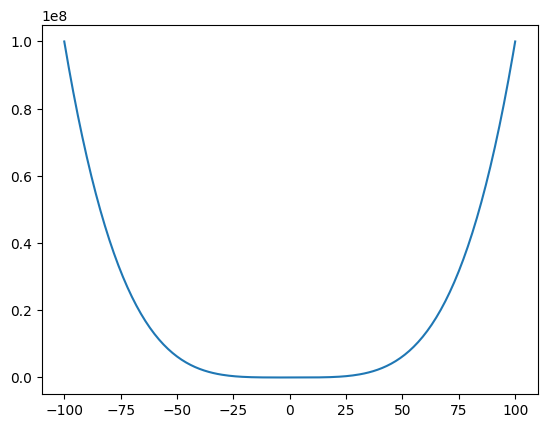

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd66eea9300>

In [7]:
draw_plot(f, -100, 100, 1)

In [31]:
print(is_unimod(f, 3, 10))

true

In [24]:
iter(f, 3, 10, 0.05)

(3.000000, 84.000000)

13
(-0.000415, 3.000000)

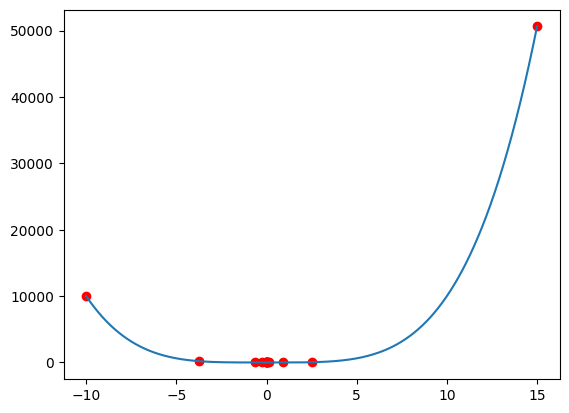

PyObject <matplotlib.collections.PathCollection object at 0x7f06e2f76d40>

In [17]:
dichotomy(f, -10, 15, 0.01)